# Atividade 4
# Redes Mundo Pequeno

### Thaís Ferreira da Silva - 2021092571

In [14]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### (a) Construir uma rede de mundo pequeno

G = nx.Graph() (veja mais detalhes no link acima). Para representar uma rede precisamos, no mínimo, os seguintes elementos:

(1) G.add_node(node), que adiciona um novo nó ao sistema;

(2) G.add_edge (node1, node2), que adiciona uma nova aresta ao sistema;

(3) list(G.nodes) que retorna uma lista de nós existentes; e

(4) list(G.neighbors(node)), que retorna os vizinhos de um nó existente.

In [15]:
def criar_rede(n,z,p):
    G = nx.Graph() # Cria um objeto do tipo grafo
    G.add_nodes_from(range(n)) # Adiciona os nós ao grafo

    #adicionar as arestas curtas com os vizinhos mais proximos
    for i in range(n):
        for j in range(1,(z//2) +1):
            G.add_edge(i,(i-j) % n)
            G.add_edge(i,(i+j) % n)

    #adicionar aleatoriamente os atalhos
    n_arestas_aleatorias = int(p*n*z/2) #usando proporcionalidade p

    for i in range(n_arestas_aleatorias):
        u = np.random.randint(n)
        v = np.random.randint(n)
        G.add_edge(u,v)

    return G

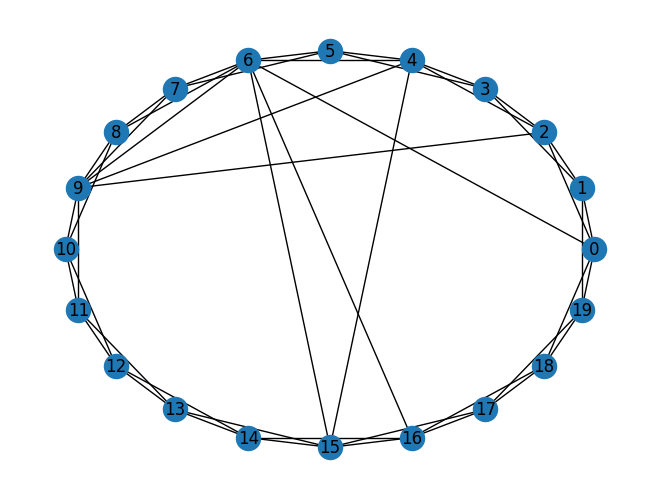

In [16]:
g = criar_rede(20, 4, 0.2)
nx.draw_circular(g, with_labels=True)

### (b) Medindo as distâncias mínimas entre nós

Escreva as três funções a seguir para encontrar e analisar a distribuição do
comprimento do caminho.

(1) FindPathLengthsFromNode(graph, node)

(2) FindAllPathLengths(graph)

(3) FindAveragePathLength(graph)

In [17]:
#busca em largura do grafo já implementada em networkx
def FindPathLengthsFromNode(graph, node):
    return dict(nx.single_source_shortest_path_length(graph, node))   

In [18]:
def FindAllPathLengths(graph):
    paths = []
    for node in graph.nodes():
        lengths_from_node = FindPathLengthsFromNode(graph, node)
        paths.extend(length for target, length in lengths_from_node.items() if target != node)
    return paths


In [19]:
def FindAveragePathLength(graph):
    paths = FindAllPathLengths(graph)
    return sum(paths) / len(paths)

In [20]:
def plot_graph_and_histogram(graph, n, z, p):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plotar o grafo usando nx.draw_circular
    nx.draw_circular(graph, ax=ax1, node_size=50)
    ax1.set_title(f"Rede de Watts-Strogatz (n={n}, z={z}, p={p})")

    
    # Plotar o histograma dos comprimentos dos caminhos
    paths = FindAllPathLengths(graph)
    ax2.hist(paths, bins=range(max(paths) +1), alpha=0.5, edgecolor='black')
    ax2.set_title("Histograma dos comprimentos dos caminhos")
    ax2.set_xlabel("Comprimento do caminho")
    ax2.set_ylabel("Número de ocorrências")
    plt.show()



##### Analise de FindAllPathLengths(graph) com o histograma de comprimentos de caminhos

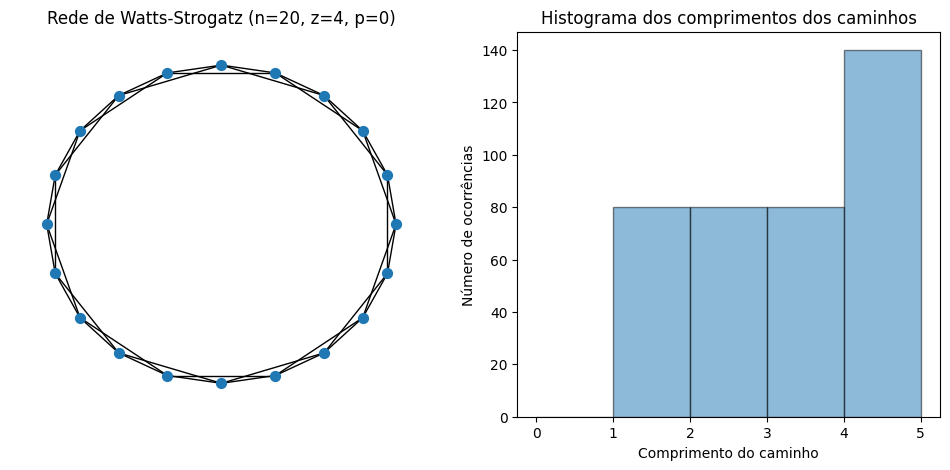

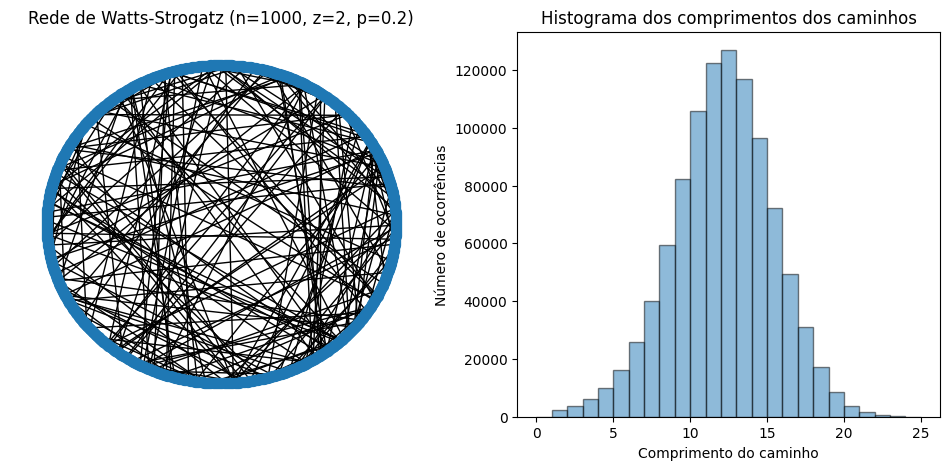

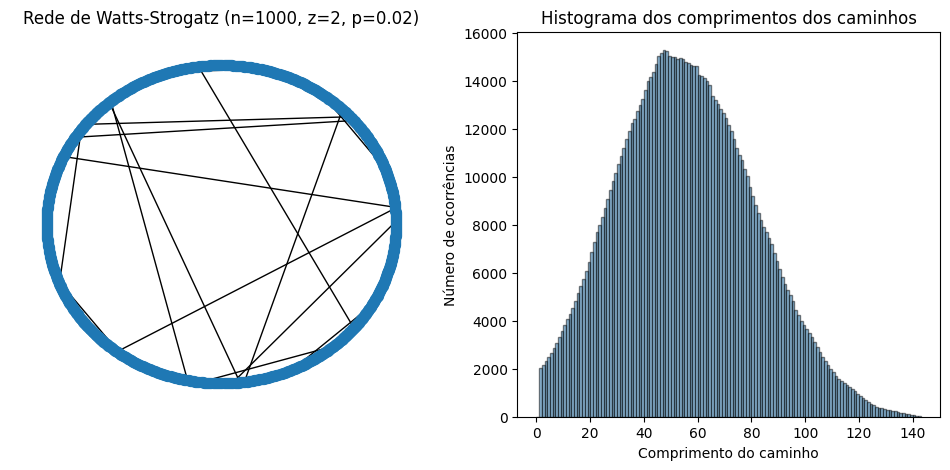

In [21]:
#histrograma de comprimentos de caminhos
grafo0 = criar_rede(20, 4, 0)
grafo1 = criar_rede(1000, 2, 0.2)
grafo2 = criar_rede(1000, 2, 0.02)

plot_graph_and_histogram(grafo0, 20, 4, 0)
plot_graph_and_histogram(grafo1, 1000, 2, 0.2)
plot_graph_and_histogram(grafo2, 1000, 2, 0.02)



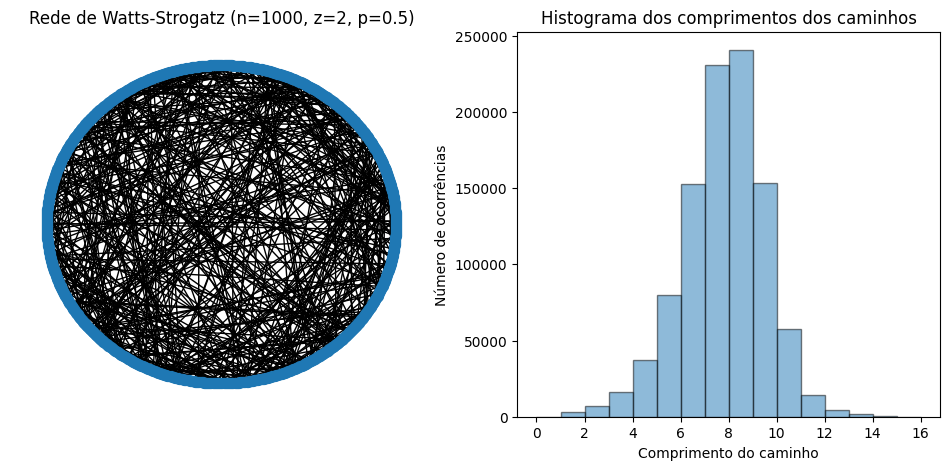

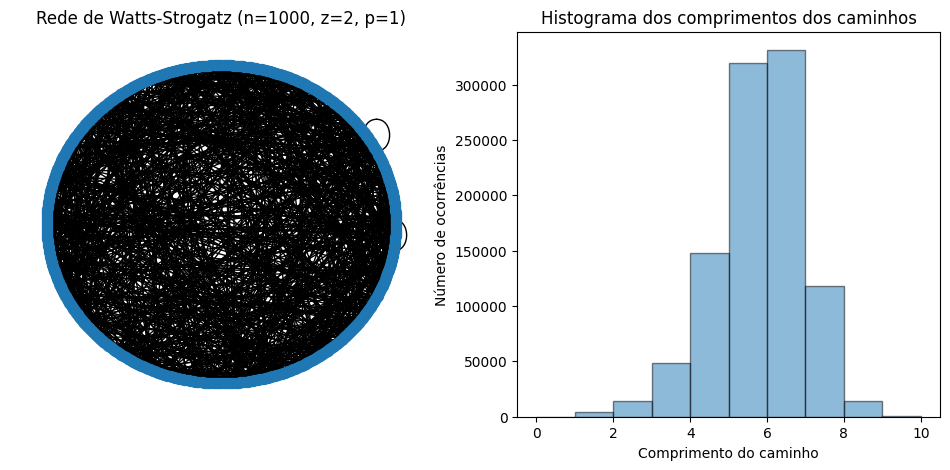

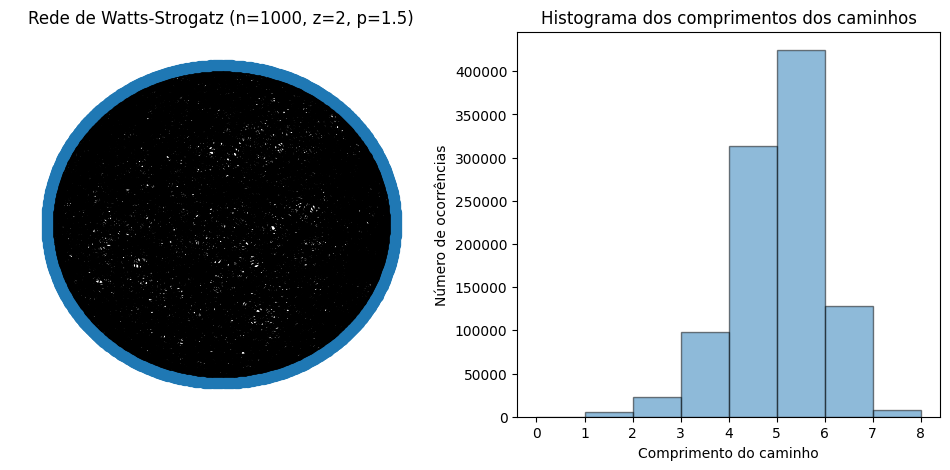

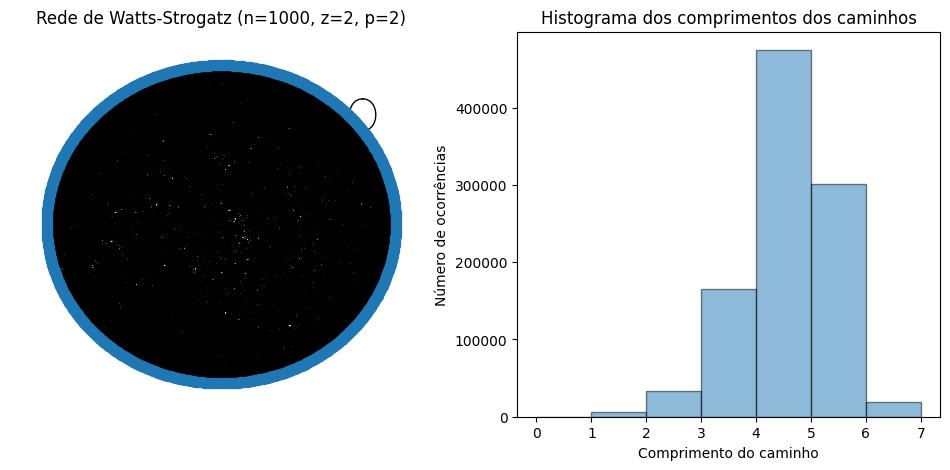

In [22]:
#teste dos 6 graus de separação
n = 1000
z = 2
probabilidades = [0.5, 1, 1.5, 2]

for p in probabilidades:
    grafo = criar_rede(n, z, p)
    caminhos = FindAllPathLengths(grafo)
    plot_graph_and_histogram(grafo, n, z, p)

A partir dos grafos formados e dos histogramas ao lado podemos perceber que o valor de p influência diretamente no numero de arestas e degrais gerados no histograma. A medica que o p aumenta, temos um maior número de arestas no grafo e um menor numero de degrais no histograma devido a existencia de caminhos menores, ou mais curtos, entre os nós.

Sobre os seis graus de separação, podemos perceber que por volta do P=1 as distâncias ficam em por volta do 6. Por mais que esse resultado não seja 100% preciso devido a escolha aleatória do algoritmo, o padrão observado aos longo dos experimentos está na probabilidade 1.



##### Testes das arestas longas

In [23]:
def plot_mean(n, z, p, samples):
    d = []
    for i in range(samples):
        grafo = criar_rede(n, z, p)
        d.append(FindAveragePathLength(grafo))

    #printar a media das medias
    print(f'Média das médias: {np.mean(d)}')
    
    # Plotar as médias dos comprimentos dos caminhos
    plt.figure(figsize=(10, 6))
    plt.plot(d, marker='o', linestyle='-', color='b')
    plt.title(f'Médias dos Comprimentos dos Caminhos (n={n}, z={z}, p={p})')
    plt.xlabel('Amostra')
    plt.ylabel('Comprimento Médio do Caminho')
    plt.grid(True)
    plt.show()

Média das médias: 9.893626262626263


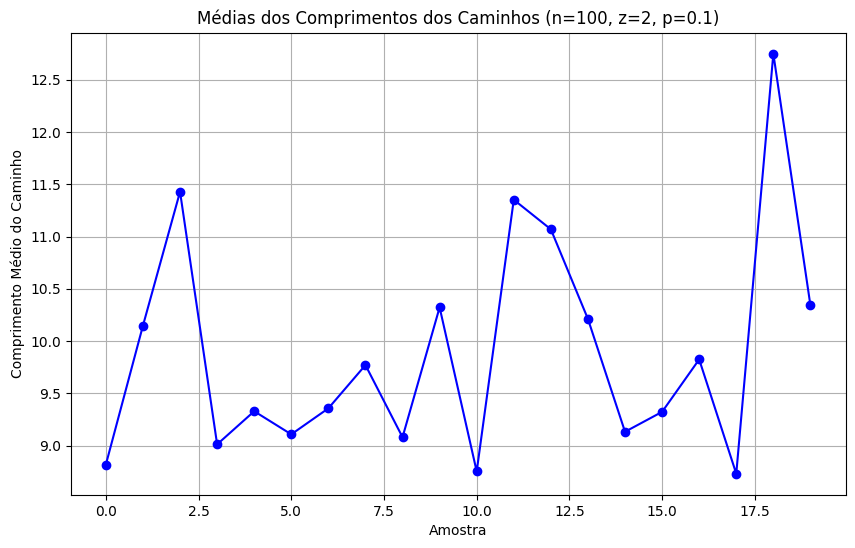

In [24]:
n = 100
z = 2
p = 0.1

plot_mean(n, z, p, 20)

Numericamente falando o esperamos 10 arestas:
$$p * n * \frac{z}{2} = 0.1 * 100 * \frac{2}{2} = 10 arestas$$

No entanto a médica encontrada gira em torno de 10, no exemplo atual temos 10.09 como a médias das médias calculadas. Essa flutuação ocorre pois algumas arestas aleatóriamente adicionadas pode já existir, ou serem laços de um nó para ele mesmo, ou sejá, é a influcencia da probabilidade da criação aleatória nos caminhos

### (c) Plote o comprimento médio do caminho entre os nós (normalizado)

Text(0.5, 0, 'Probabilidade de Reconexão (p)')

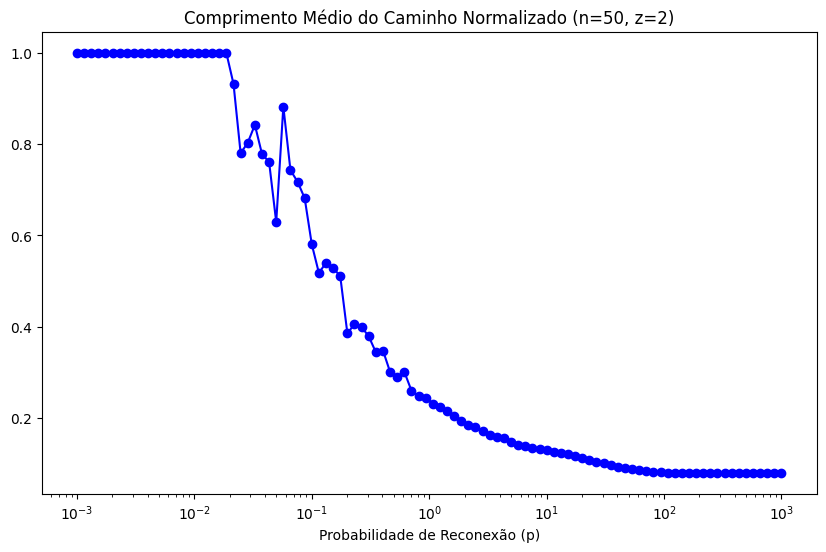

In [25]:
n = 50
z = 2

#com p = 0
grafo0 = criar_rede(n, z, 0)
media_base = FindAveragePathLength(grafo0)

#variando p entre 0,001 e 1000 (igualmente espaçados entre 10^-3 e 10^3)
probabilidades = np.logspace(-3, 3, 100)
medias = []
for p in probabilidades:
    grafo = criar_rede(n, z, p)
    medias.append(FindAveragePathLength(grafo)/media_base)

#plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(probabilidades, medias, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.title(f'Comprimento Médio do Caminho Normalizado (n={n}, z={z})')
plt.xlabel('Probabilidade de Reconexão (p)')



O valor de p é fizado em 1 para os valores de p pequenos pois a chance de atalhos serem criados é muito baixa, tornando o seu as suas distancias semelhantes ao caso de p=0. Por isso ao aumentar o valor de p, temos uma probabilidade maior de novas e boas arestas de atalho serem criadas, e consequentimente decaindo no grafico de forma logaritmica

### (d) Comparação com Watts e Strogatz

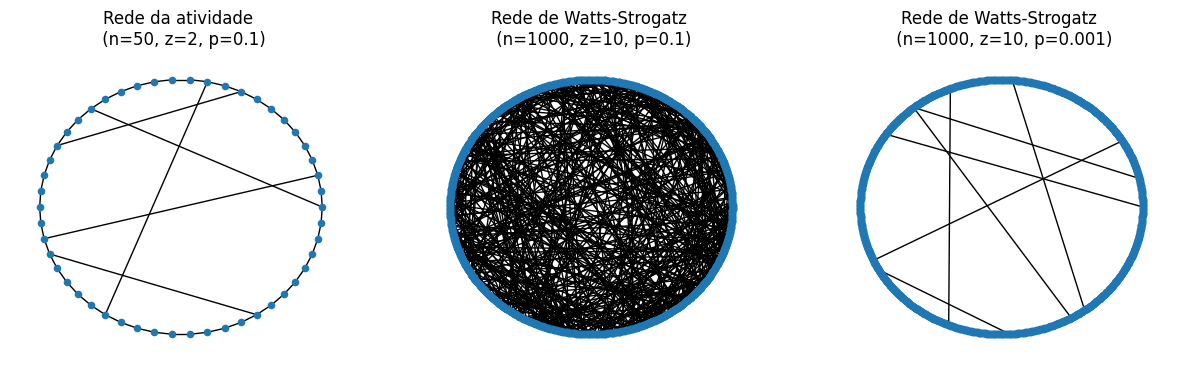

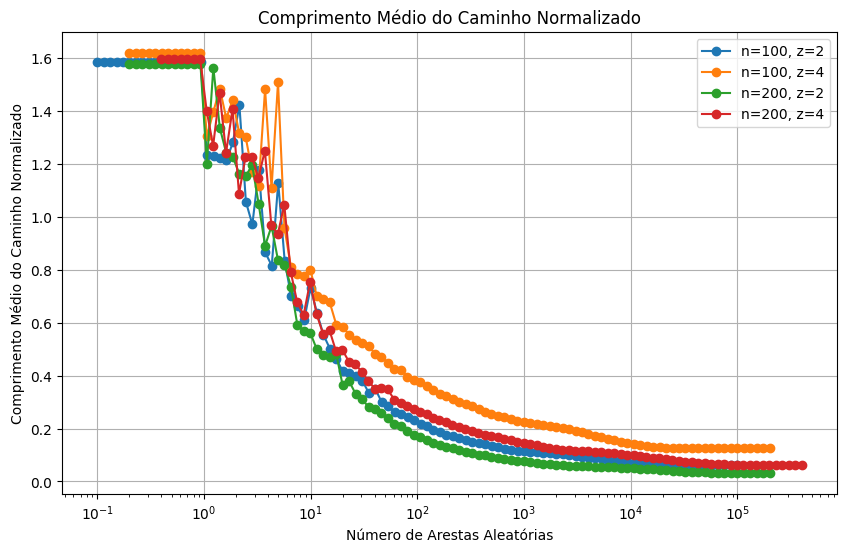

In [31]:

# Comparação com Watts e Strogatz
n1 = 50
z1 = 2
p1 = 0.1

n2 = 1000
z2 = 10
p2 = 0.1
p3 = 0.001

# Gerar redes
grafo1 = criar_rede(n1, z1, p1)
grafo2 = nx.watts_strogatz_graph(n2, z2, p2)
grafo3 = nx.watts_strogatz_graph(n2, z2, p3)

# Plotar os grafos nx.draw_circular
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
nx.draw_circular(grafo1, ax=ax1, node_size=20)
nx.draw_circular(grafo2, ax=ax2, node_size=20)
nx.draw_circular(grafo3, ax=ax3, node_size=20)
ax1.set_title(f"Rede da atividade \n (n={n1}, z={z1}, p={p1})")
ax2.set_title(f"Rede de Watts-Strogatz \n (n={n2}, z={z2}, p={p2})")
ax3.set_title(f"Rede de Watts-Strogatz \n (n={n2}, z={z2}, p={p3})")
plt.show()

#plotar as medias dos comprimentos dos caminhos

'''
probabilidades = np.logspace(-3, 3, 100)
medias = []
for p in probabilidades:
    grafo = criar_rede(n, z, p)
    medias.append(FindAveragePathLength(grafo)/media_base)

#plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(probabilidades, medias, marker='o', linestyle='-', color='b')
'''
plt.figure(figsize=(10, 6))
probabilidades = np.logspace(-3, 3, 100)

for n in [100, 200]:
    for z in [2, 4]:
        d = []
        medias = []
        for p in probabilidades:
            grafo = criar_rede(n, z, p)
            media = FindAveragePathLength(grafo)
            d.append(np.pi * z * media/n)
            medias.append(p * n * z/2)
        plt.plot(medias, d, marker='o', linestyle='-', label=f'n={n}, z={z}')

plt.xscale('log')
plt.title('Comprimento Médio do Caminho Normalizado')
plt.xlabel('Número de Arestas Aleatórias')
plt.ylabel('Comprimento Médio do Caminho Normalizado')
plt.legend()
plt.grid(True)
plt.show()



Podemos perceber que o segundo grafo de watts-strogatz com n=1000 z=10 e o=0,001 é o mais semelhante com a minha implementação, visto o menor número de atalhos criados.

### (e) Redes reais

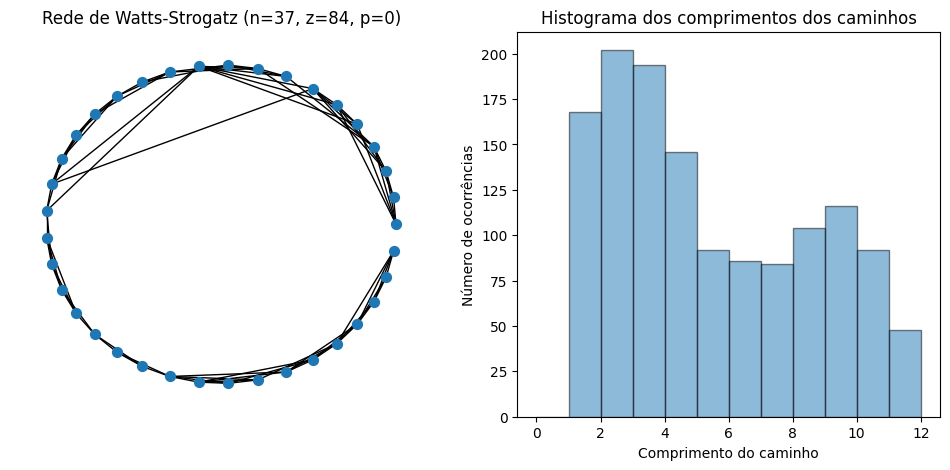

In [36]:
grafo = nx.read_edgelist('entradas/ENZYMES_g1.edges')

paths = FindAllPathLengths(grafo)
media = FindAveragePathLength(grafo)

plot_graph_and_histogram(grafo, grafo.number_of_nodes(), grafo.number_of_edges(), 0)